In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import os
import torch
from utils.colors import colors_dictionary

import numpy as np 

from experiment_utils.largestconnectedcomponent import lcc_dataset
from utils.load_datasets import load_data

In [ ]:
from experiment_utils.curvatures_cuda import BF_curvature_undirected,JT_curvature,JL_curvature,AF_curvature
import torch_geometric as torch_geometric

In [6]:
results_dir = "results_figures/"

In [45]:
dataset_names = ["Texas","Cornell","Wisconsin","Chameleon","Cora","Citeseer","Pubmed"]

### Curvature Distribution

In [83]:
def curvatures_distributions(Curvature1,Curvature2,Curvature3,Curvature4,Curvature5,Curvature6,edge_index,colorlabels,labels ,title:str):
    FigCurvature,axCurvature = plt.subplot_mosaic([['h1','h2','h3','h4'],['.','.','.','.'],['D','D','D','D'],['.','.','.','.'],['h5','h5','h6','h6']],
                                  figsize=(5.5,2.85),gridspec_kw = {'width_ratios':[1,1,1,1],'height_ratios': [0.7,0.23,0.5,0.23,0.65],'hspace':0},dpi = 450)

    nh1, bins, patches1 = axCurvature['h1'].hist(Curvature1[edge_index],bins = np.linspace(-2,5,41),linewidth=0.3,edgecolor = 'black',color = colors_dictionary[colorlabels[0]],label = labels[0],rwidth=0.7)
    ax1 =  axCurvature['h1'].inset_axes([0.55, 0.55 , 0.4, 0.4])
    nax1, bins, patches = ax1.hist(Curvature1[edge_index][torch.where(Curvature1[edge_index] < -0.5)],bins = np.linspace(-2,5,41),color = colors_dictionary[colorlabels[0]],linewidth=0.1,edgecolor = 'black')
    ax1.set_xlim(-2,-0.5)
    ax1.tick_params(labelsize=6)

    nh2, bins, patches2 = axCurvature['h2'].hist(Curvature2[edge_index],bins = np.linspace(-2,5,41),linewidth=0.3,edgecolor = 'black',color = colors_dictionary[colorlabels[1]],label = labels[1],rwidth=0.7)
    ax2 =  axCurvature['h2'].inset_axes([0.55, 0.55 , 0.4, 0.4])
    nax2, bins, patches = ax2.hist(Curvature2[edge_index][torch.where(Curvature2[edge_index] < -0.5)],bins = np.linspace(-2,5,41),color = colors_dictionary[colorlabels[1]],linewidth=0.1,edgecolor = 'black')
    ax2.set_xlim(-2,-0.5)
    ax2.tick_params(labelsize=6)

    nh3, bins, patches3 = axCurvature['h3'].hist(Curvature3[edge_index],bins = np.linspace(-2,5,41),linewidth=0.3,edgecolor = 'black',color = colors_dictionary[colorlabels[2]],label = labels[2],rwidth=0.7)
    
    ax3 =  axCurvature['h3'].inset_axes([0.55, 0.55 , 0.4, 0.4])
    nax3, bins, patches = ax3.hist(Curvature3[edge_index][torch.where(Curvature3[edge_index] < -0.5)],bins = np.linspace(-2,5,41),color = colors_dictionary[colorlabels[2]],linewidth=0.1,edgecolor = 'black')
    ax3.set_xlim(-2,-0.5)
    ax3.tick_params(labelsize=6)
    
    nh4, bins, patches4 = axCurvature['h4'].hist(Curvature4[edge_index],bins = np.linspace(-2,5,41),linewidth=0.3,edgecolor = 'black',color = colors_dictionary[colorlabels[3]],label = labels[3],rwidth=0.7)

    ax4 =  axCurvature['h4'].inset_axes([0.55, 0.55 , 0.4, 0.4])
    nax4, bins, patches = ax4.hist(Curvature4[edge_index][torch.where(Curvature4[edge_index] < -0.5)],bins = np.linspace(-2,5,41),color = colors_dictionary[colorlabels[3]],linewidth=0.1,edgecolor = 'black')
    ax4.set_xlim(-2,-0.5)
    ax4.tick_params(labelsize=6)

    
    #

    if title == "Chameleon":
         n, bins, patches6 = axCurvature['h6'].hist(Curvature6[edge_index],bins = np.linspace(-110,9000,800),
                                              color = colors_dictionary[colorlabels[5]],rwidth=0.7,
                                              label = labels[5])
         nh4, bins, patches5 = axCurvature['h5'].hist(Curvature5[edge_index],bins = np.linspace(-110,80,180),
                                              color = colors_dictionary[colorlabels[4]],rwidth=0.7,
                                              label = labels[4])
    else:
         n, bins, patches6 = axCurvature['h6'].hist(Curvature6[edge_index],bins = np.linspace(-110,10,100),
                                              linewidth=0.5,edgecolor = 'black',color = colors_dictionary[colorlabels[5]],rwidth=0.7,
                                              label = labels[5])
         nh4, bins, patches5 = axCurvature['h5'].hist(Curvature5[edge_index],bins = np.linspace(-110,10,100),
                                              linewidth=0.5,edgecolor = 'black',color = colors_dictionary[colorlabels[4]],rwidth=0.7,
                                              label = labels[4])
    patch = [patches1[0],patches2[0],patches3[0],patches4[0],patches5[0],patches6[0]]
    labs = [l.get_label() for l in patch]
    axCurvature['h5'].legend(patch, labs, loc="lower left",fontsize = 7, ncol=6,bbox_to_anchor=(-0.025, -0.8))
    #axCurvature['h4'].plot(2*[min(Curvature4[edge_index[0],edge_index[1]])],[0,100],color = 'black',linestyle = '--',linewidth = 0.2)


    for i in range(4):
        axCurvature['h'+str(i+1)].set_xticks([-2,0,5])
        if title == "Chameleon":
            axCurvature['h'+str(i+1)].set_xlim(-2.2,9)
        if title == "Cora" or title =="Citeseer":
            axCurvature['h'+str(i+1)].set_xlim(-2.2,6.5)
        


    for i in range(6):
        axCurvature['h'+str(i+1)].tick_params(labelsize=6)

    axCurvature['D'].tick_params(labelsize=6)
    axCurvature['D'].set_ylabel("Density",fontsize = 7)
    ax1.tick_params(labelsize=6)
    ax2.tick_params(labelsize=6)
    ax3.tick_params(labelsize=6)
    ax4.tick_params(labelsize=6)
    #n, bins, patches = axCurvature['h5'].hist(Curvature5[edge_index[0],edge_index[1]],color = 'cyan',rwidth=0.7)

    _= sns.kdeplot(data = Curvature1[edge_index], ax = axCurvature['D'],label =  labels[0],color = colors_dictionary[colorlabels[0]])
    _= sns.kdeplot(data = Curvature2[edge_index], ax = axCurvature['D'],label =  labels[1],color = colors_dictionary[colorlabels[1]])
    _= sns.kdeplot(data = Curvature3[edge_index], ax = axCurvature['D'],label =  labels[2],color = colors_dictionary[colorlabels[2]])
    _= sns.kdeplot(data = Curvature4[edge_index], ax = axCurvature['D'],label =  labels[3],color = colors_dictionary[colorlabels[3]])
    #_= sns.kdeplot(data = Curvature5[edge_index[0],edge_index[1]], ax = axCurvature['D'],label =  labels[4],color = 'cyan')
    
    

    axCurvature['h1'].sharey(axCurvature['h2'])
    axCurvature['h2'].sharey(axCurvature['h3'])
    axCurvature['h3'].sharey(axCurvature['h4'])

    axCurvature['h2'].set_yticklabels([])
    axCurvature['h3'].set_yticklabels([])
    axCurvature['h4'].set_yticklabels([])
    
    axCurvature['h1'].set_ylim(0,max([max(nh1),max(nh2),max(nh3),max(nh4)])+50)

    ax1.sharey(ax2)
    ax2.sharey(ax3)
    ax3.sharey(ax4)

    ax2.set_yticklabels([])
    ax3.set_yticklabels([])
    
    ax1.set_xlim(-2,-0.5)
    ax1.set_ylim(0,max([max(nax1),max(nax2),max(nax3),max(nax4)])+20)

    axCurvature['h5'].sharey(axCurvature['h6'])
    [label.set_visible(False) for label in axCurvature['h6'].get_yticklabels()]

    axCurvature['h1'].text(0, 1.3,
                        horizontalalignment='left',
                        verticalalignment='top',
                        transform=axCurvature['h1'].transAxes,
                        s = r"$\mathbf{"+title+"}$" ,fontsize = 9)

    _ = axCurvature['D'].tick_params(labelsize=6)

    FigCurvature.savefig(os.path.join(results_dir,"curvatures_comparison_" + title + ".pdf"),format = 'pdf',bbox_inches='tight')

In [84]:
curvatures = ["BFc","BFc_3","BFc_mod","JLc","AFc_3","AFc_4"]

c:\ProgramFiles\Anaconda3\lib\site-packages\torch_geometric\data\in_memory_dataset.py:284: UserWarning: It is not recommended to directly access the internal storage format `data` of an 'InMemoryDataset'. If you are absolutely certain what you are doing, access the internal storage via `InMemoryDataset._data` instead to suppress this warning. Alternatively, you can access stacked individual attributes of every graph via `dataset.{attr_name}`.
  warnings.warn(msg)


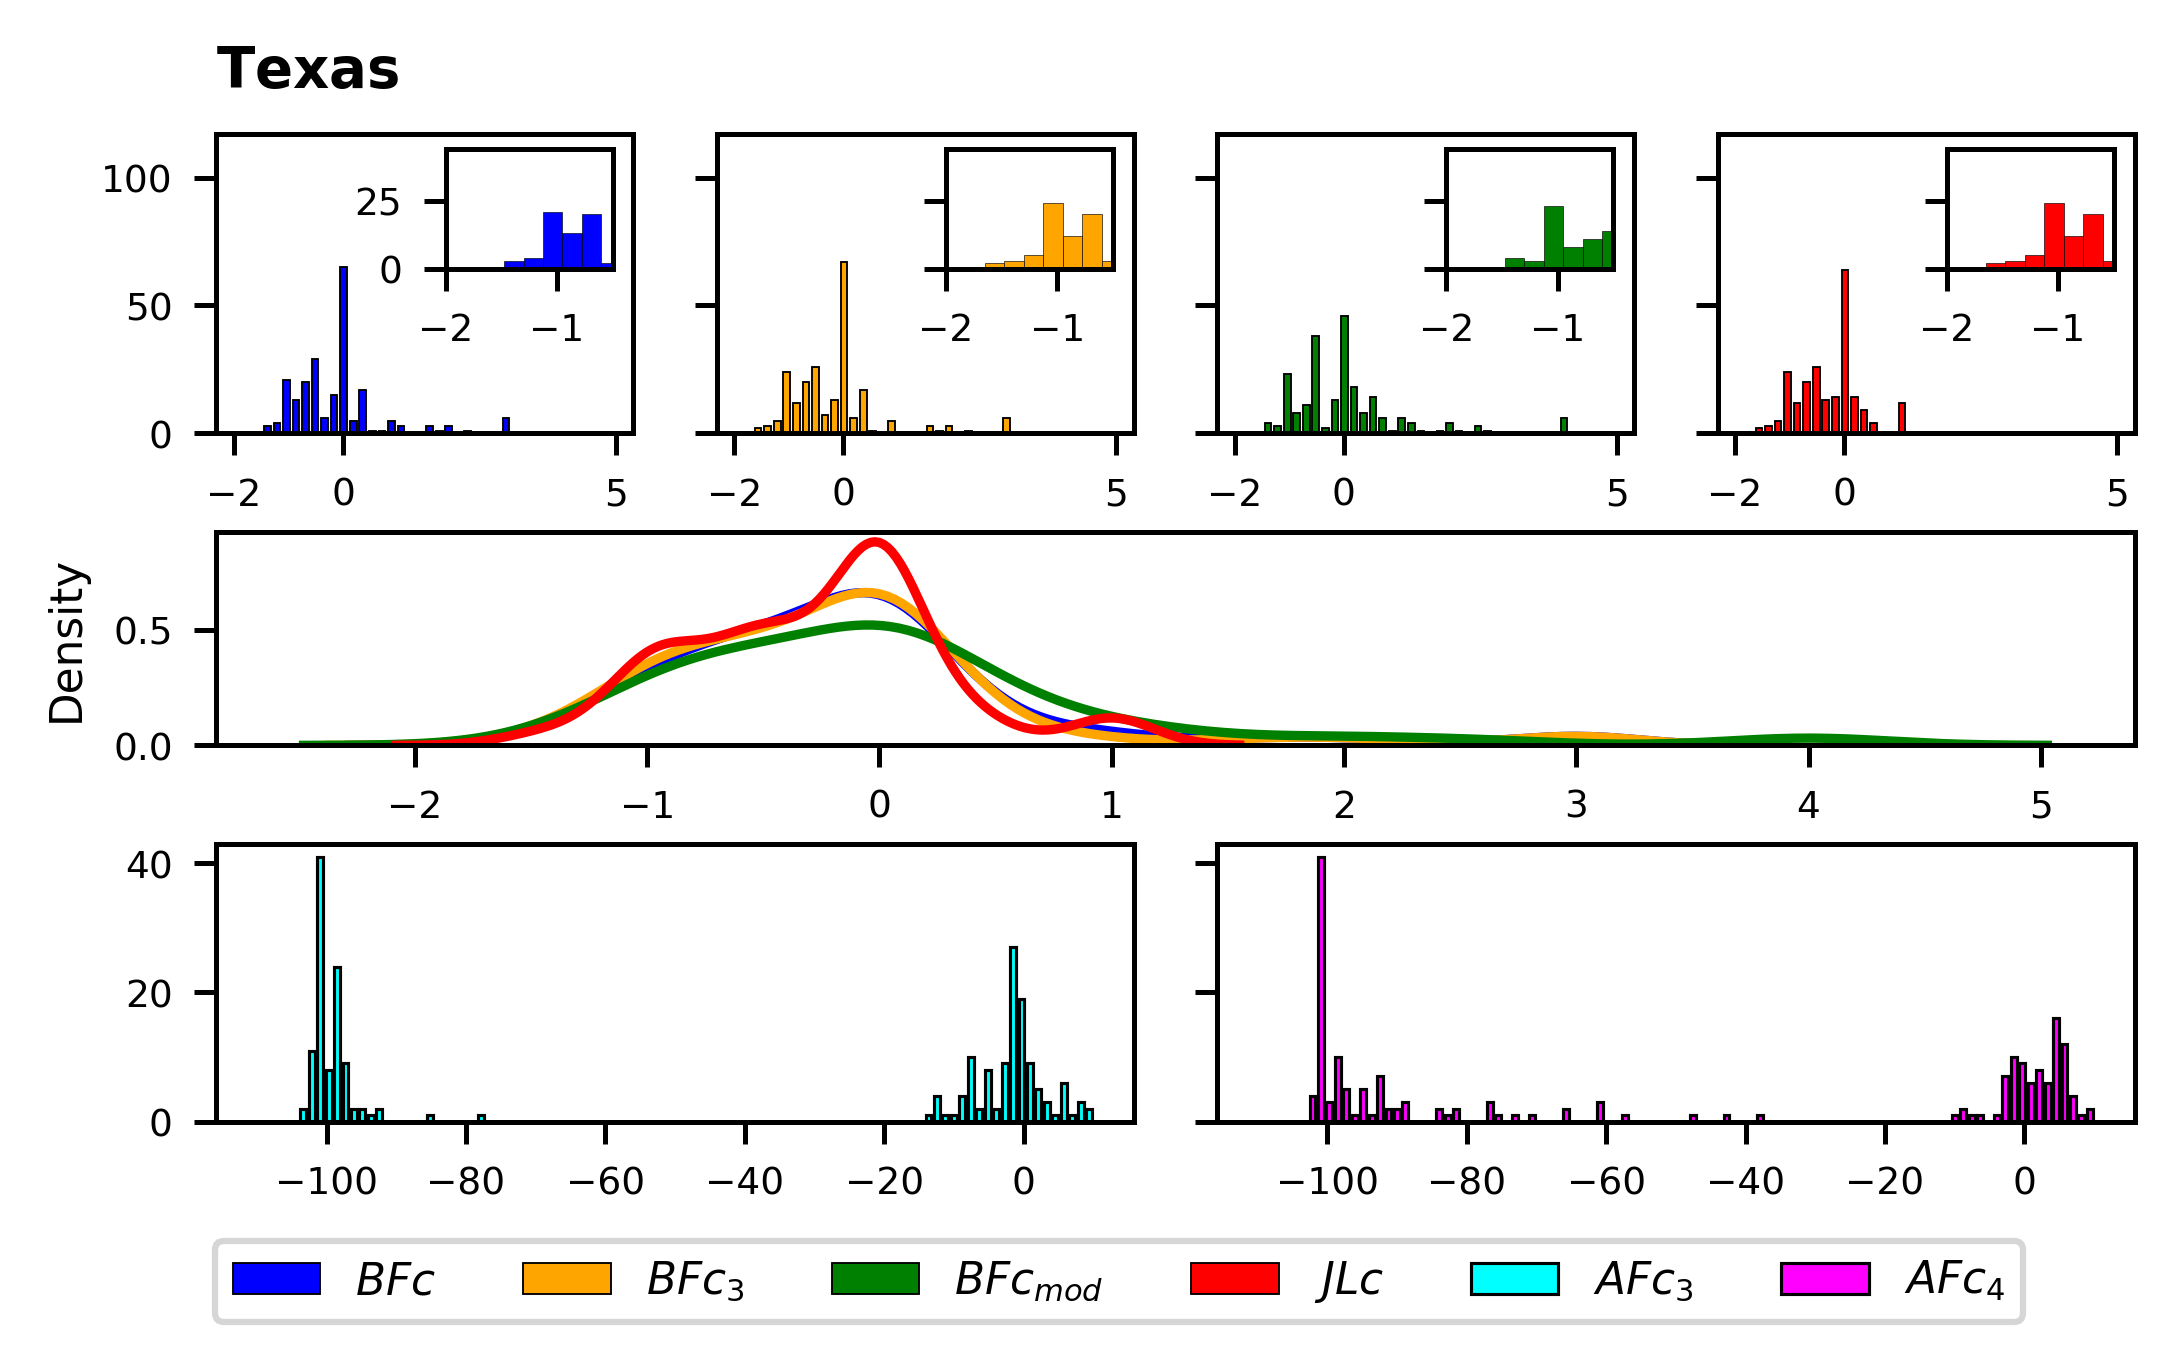

In [87]:
for dataset_name in dataset_names[]:
    curvature_matrices = {}

    dataset,_,_ = load_data(dataset_name)
    dataset_lcc = lcc_dataset(dataset, to_undirected = True)
    data_lcc = dataset_lcc[0]

    G_lcc = torch_geometric.utils.to_networkx(data_lcc)
    G_lcc = G_lcc.to_undirected()

    edge_index = data_lcc.edge_index.clone()
    

    A = torch_geometric.utils.to_dense_adj(edge_index)[0]
    

    A_upper = np.triu(A)
    edge_index_upper = np.where(A_upper)

    A = A.cuda()
    edge_index = edge_index.cuda() 
    N = A.shape[0]
    C = torch.zeros(N, N).cuda()


    for curvature_type in curvatures:
        if curvature_type == "BFc":
            C = BF_curvature_undirected(A,edge_index ,C=C,fcc = True)
        elif curvature_type == "BFc_3":
            C = BF_curvature_undirected(A,edge_index ,C=C,fcc = False)
        elif curvature_type == "BFc_mod":
            C = JT_curvature(A,C=C)
        elif curvature_type == "JLc":
            C = JL_curvature(A,C=C)
        elif curvature_type == "AFc_3":
            C = AF_curvature(A,3,C=C)
        elif curvature_type == "AFc_4":
            C = AF_curvature(A,4,C=C)

        curvature_matrices[curvature_type] = C.cpu()
        
    curvatures_distributions(curvature_matrices["BFc"],curvature_matrices["BFc_3"],curvature_matrices["BFc_mod"],curvature_matrices["JLc"],curvature_matrices["AFc_3"],curvature_matrices["AFc_4"],
                         edge_index_upper,
                         ["BFc","BFc_no4cycle","BFc_mod","JLc","AFc_3","AFc_4"],
                         [r"$BFc$",r"$BFc_{3}$",r"$BFc_{mod}$",r"$JLc$",r"$AFc_3$",r"$AFc_4$"],
                         dataset_name)
    